In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.engine import reflection

# Retreaving measurement dataframe


In [4]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [5]:
insp = reflection.Inspector.from_engine(engine)

In [6]:
print(insp.get_table_names())

['measurement', 'station']


In [7]:
for col in insp.get_columns('measurement'):
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
query= '''select
                *
            from 
                measurement
        
        
        
        
        '''

In [9]:
conn= engine.connect()

In [10]:
df_measurement = pd.read_sql(query, conn)
df_measurement.head(15)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [11]:
conn.close()

# Retrieving second dataframe- Station

In [12]:
for col in insp.get_columns('station'):
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
query2= '''select
                *
            from 
                station
        
        
        
        
        '''

In [14]:
conn2= engine.connect()

df_station = pd.read_sql(query2, conn2)

In [15]:
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [16]:
conn2.close()

# Precipitation Analysis


In [17]:
df_measurement.head(15)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [18]:
#converting date-column from text to datetime

df_measurement['date']= pd.to_datetime(df_measurement['date'])

In [19]:
df_measurement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [20]:
df_measurement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       19550 non-null  int64         
 1   station  19550 non-null  object        
 2   date     19550 non-null  datetime64[ns]
 3   prcp     18103 non-null  float64       
 4   tobs     19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 763.8+ KB


In [21]:
#last 12 months of precipitation data
sort_measurement= df_measurement.sort_values(by="date",ascending=True) 
sort_measurement= sort_measurement.set_index("date").last('366D')
sort_measurement

,id,station,prcp,tobs
date,,,,
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,11851,USC00519523,0.02,80.0
...,...,...,...,...
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0


In [22]:
prec_Analysis= sort_measurement.reset_index()
prec_Analysis = prec_Analysis[['date','prcp']]

In [23]:
prec_Analysis

,date,prcp
0,2016-08-23,NaN
1,2016-08-23,0.00
2,2016-08-23,0.70
3,2016-08-23,1.79
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


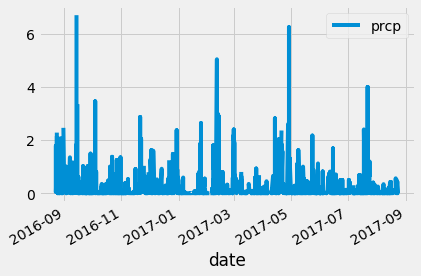

In [24]:
precipitation_graph = prec_Analysis.plot(x= 'date', y='prcp', kind='line' )

In [25]:
precipitation_graph

In [26]:
prec_Analysis.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [27]:
df_station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [28]:

#total number of stations
df_station['station'].count()

9

In [29]:
#list of stations and observation counts in descending order

station_activity= df_measurement.groupby(['station']).count()['tobs']
station_activity= station_activity.sort_values(ascending=False)
station_activity= station_activity.reset_index()
station_activity

,station,tobs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [30]:
#Station with the highest number of Observations
maximum= station_activity['tobs'].max()
maximum
mask_maxStation = (station_activity['tobs']== maximum)
maxStation =station_activity[mask_maxStation]
maxStation

,station,tobs
0,USC00519281,2772


In [58]:
#min temperature for station-USC00519281
df_measurement
min_temp_mask = (df_measurement['station']== 'USC00519281')
min_temp =df_measurement[min_temp_mask]
min_temp= min_temp.tobs.min()
min_temp

54.0

In [62]:
#max temperature for station-USC00519
max_temp= df_measurement[min_temp_mask].tobs.max()
max_temp

85.0

In [65]:
#avg temperature for station-USC00519281
avg_temp= df_measurement[min_temp_mask].tobs.mean()
avg_temp


71.66378066378067

# Design a query to retrieve the last 12 months of temperature observation data


In [34]:
#last 12 months of temperature observation data
station_analysis= sort_measurement.reset_index()
station_analysis = station_analysis[['station','tobs', 'date']]
station_analysis

,station,tobs,date
0,USC00517948,80.0,2016-08-23
1,USC00519397,81.0,2016-08-23
2,USC00516128,74.0,2016-08-23
3,USC00519281,77.0,2016-08-23
4,USC00519523,80.0,2016-08-23
...,...,...,...
2225,USC00516128,76.0,2017-08-22
2226,USC00519397,81.0,2017-08-23
2227,USC00514830,82.0,2017-08-23
2228,USC00519523,82.0,2017-08-23


In [35]:
#1 year data for stations
tobsFor1year= station_analysis.groupby(['station']).count().sort_values(by='tobs', ascending=False)
tobsFor1year

,tobs,date
station,,
USC00519397,361,361
USC00519281,352,352
USC00516128,349,349
USC00513117,343,343
USC00519523,337,337
USC00514830,305,305
USC00517948,183,183


In [36]:
#Station with the maximum number of tobs for the last one year

maximum1year= tobsFor1year['tobs'].max()
mask_max1year = (tobsFor1year['tobs']== maximum1year)
maxStation1year =tobsFor1year[mask_max1year].reset_index()
maxStation1year

,station,tobs,date
0,USC00519397,361,361


In [37]:
maxStation1year['station']

0    USC00519397
Name: station, dtype: object

In [38]:
station_analysis['station']

0       USC00517948
1       USC00519397
2       USC00516128
3       USC00519281
4       USC00519523
           ...     
2225    USC00516128
2226    USC00519397
2227    USC00514830
2228    USC00519523
2229    USC00516128
Name: station, Length: 2230, dtype: object

In [39]:
station_max_name= maxStation1year['station']
station_max_name

0    USC00519397
Name: station, dtype: object

In [40]:


mask_3= (station_analysis['station']== 'USC00519397')
mask_3
top_station= station_analysis[mask_3]
top_station

,station,tobs,date
1,USC00519397,81.0,2016-08-23
8,USC00519397,79.0,2016-08-24
16,USC00519397,80.0,2016-08-25
21,USC00519397,79.0,2016-08-26
31,USC00519397,77.0,2016-08-27
...,...,...,...
2212,USC00519397,79.0,2017-08-19
2217,USC00519397,81.0,2017-08-20
2219,USC00519397,81.0,2017-08-21
2223,USC00519397,82.0,2017-08-22


<function matplotlib.pyplot.show(*args, **kw)>

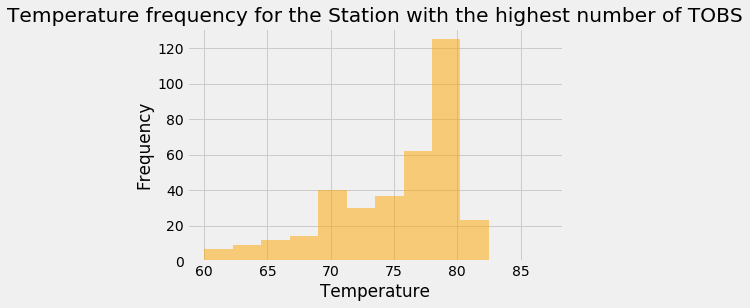

In [41]:
import matplotlib.mlab as mlab

n_bins= 12
x= top_station['tobs']
plt.hist(x, n_bins, facecolor='orange', alpha=0.5)


plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature frequency for the Station with the highest number of TOBS')

plt.show

# Step 2- Climate App

In [42]:
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [43]:
query3= '''select
                station
            from 
                station
        
        
        
        
        '''

In [44]:
#id INTEGER
#station TEXT
#date TEXT
#prcp FLOAT
#tobs FLOAT

In [45]:
conn= engine.connect()

In [46]:
df_ = pd.read_sql(query, conn)
df_measurement.head(15)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [47]:
conn.close()